# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**


In [20]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
gas_turbine_co_and_nox_emission_data_set = fetch_ucirepo(id=551) 
  
# data (as pandas dataframes) 
X = gas_turbine_co_and_nox_emission_data_set.data.features 
y = gas_turbine_co_and_nox_emission_data_set.data.targets 
  
# metadata 
print(gas_turbine_co_and_nox_emission_data_set.metadata) 
  
# variable information 
print(gas_turbine_co_and_nox_emission_data_set.variables) 


{'uci_id': 551, 'name': 'Gas Turbine CO and NOx Emission Data Set', 'repository_url': 'https://archive.ics.uci.edu/dataset/551/gas+turbine+co+and+nox+emission+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/551/data.csv', 'abstract': 'The dataset contains 36733 instances of 11 sensor measures aggregated over one hour, from a gas turbine located in Turkey for the purpose of studying flue gas emissions, namely CO and NOx.', 'area': 'Computer Science', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 36733, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5WC95', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by mea

In [22]:
import pandas as pd

# Load the data
url = "https://archive.ics.uci.edu/static/public/551/data.csv"
df = pd.read_csv(url)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Summary statistics
summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)

Missing Values:
year    0
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

Summary Statistics:
               year            AT            AP            AH          AFDP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    2012.985735     17.712726   1013.070165     77.867015      3.925518   
std        1.418965      7.447451      6.463346     14.461355      0.773936   
min     2011.000000     -6.234800    985.850000     24.085000      2.087400   
25%     2012.000000     11.781000   1008.800000     68.188000      3.355600   
50%     2013.000000     17.801000   1012.600000     80.470000      3.937700   
75%     2014.000000     23.665000   1017.000000     89.376000      4.376900   
max     2015.000000     37.103000   1036.600000    100.200000      7.610600   

               GTEP           TIT           TAT           TEY           CDP  \
count  36733.000000  36733.000000  3673

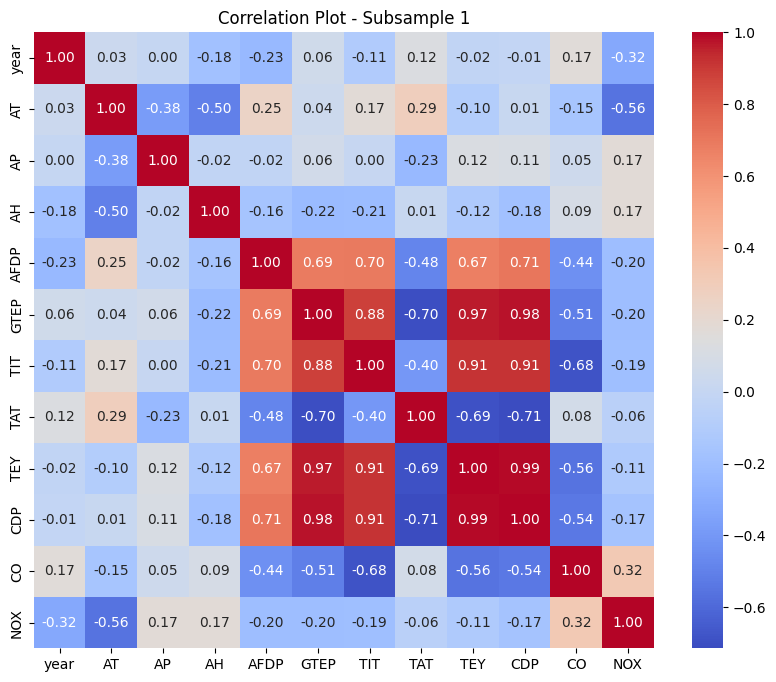

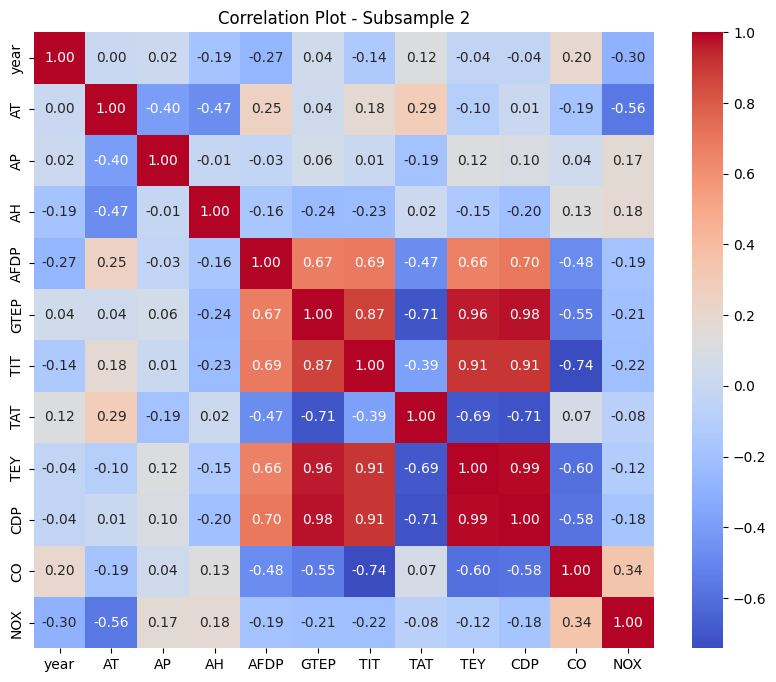

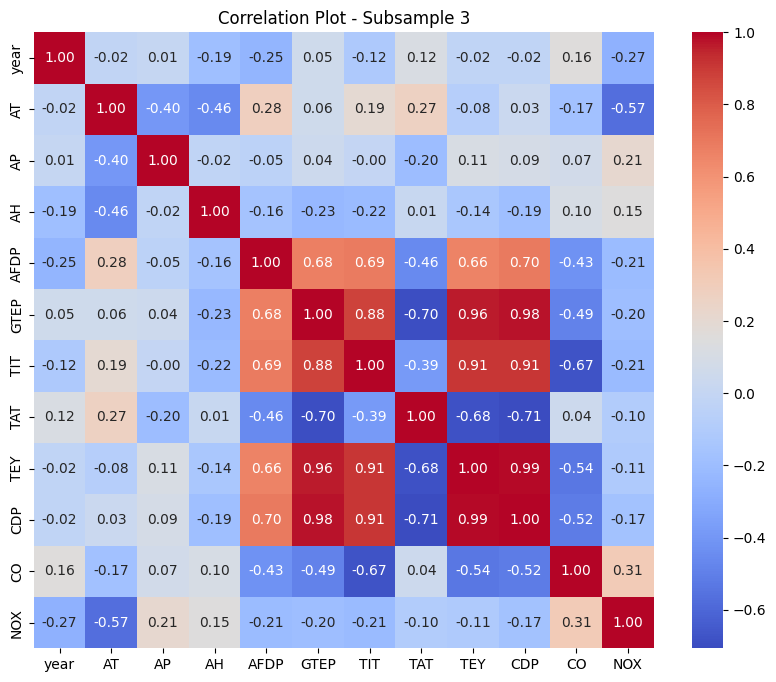

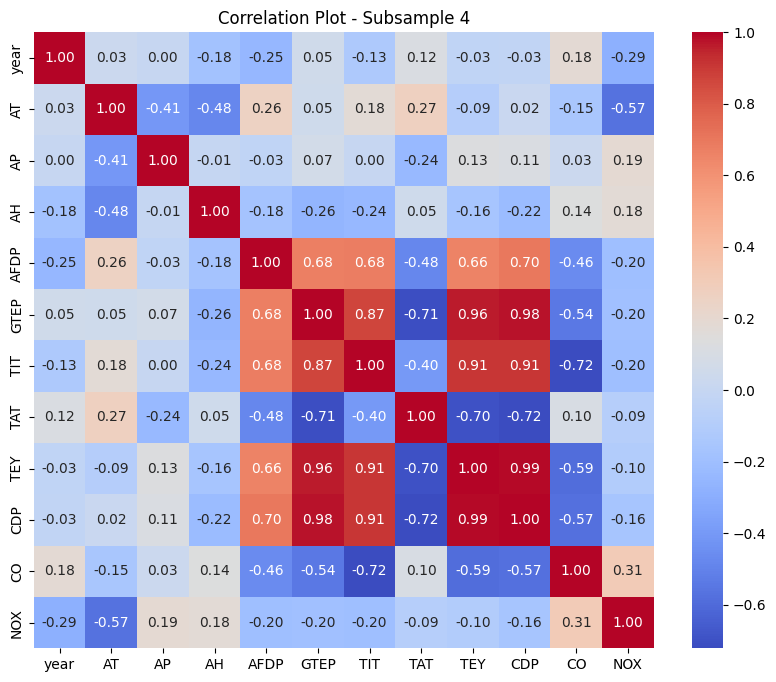

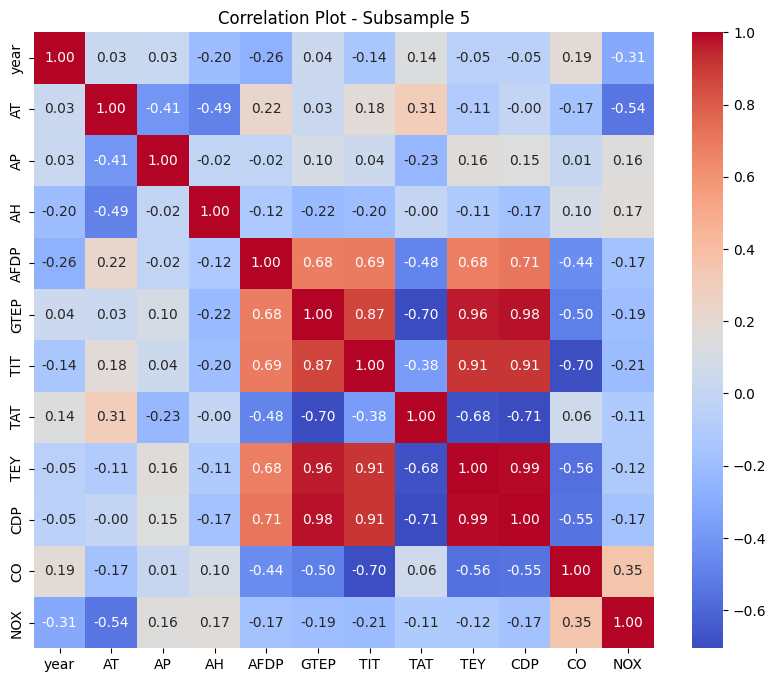

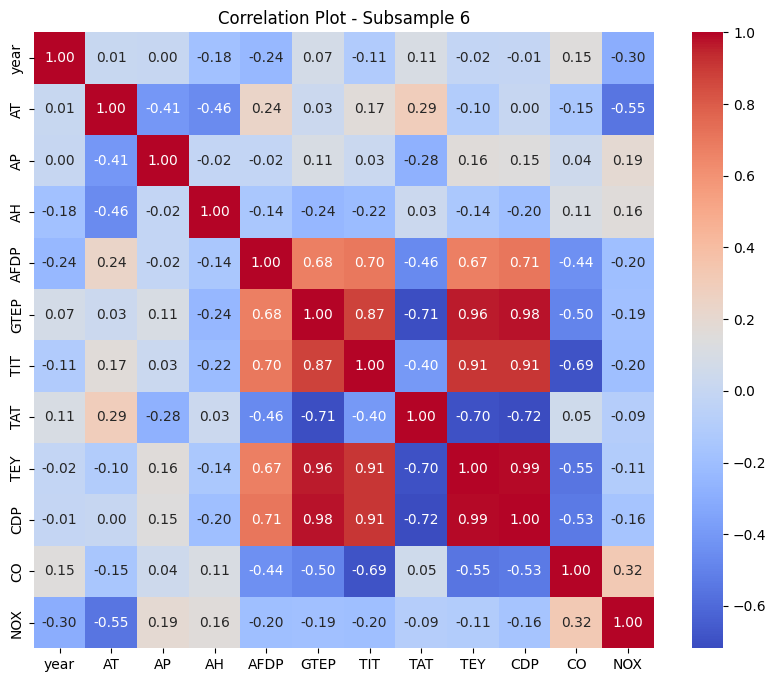

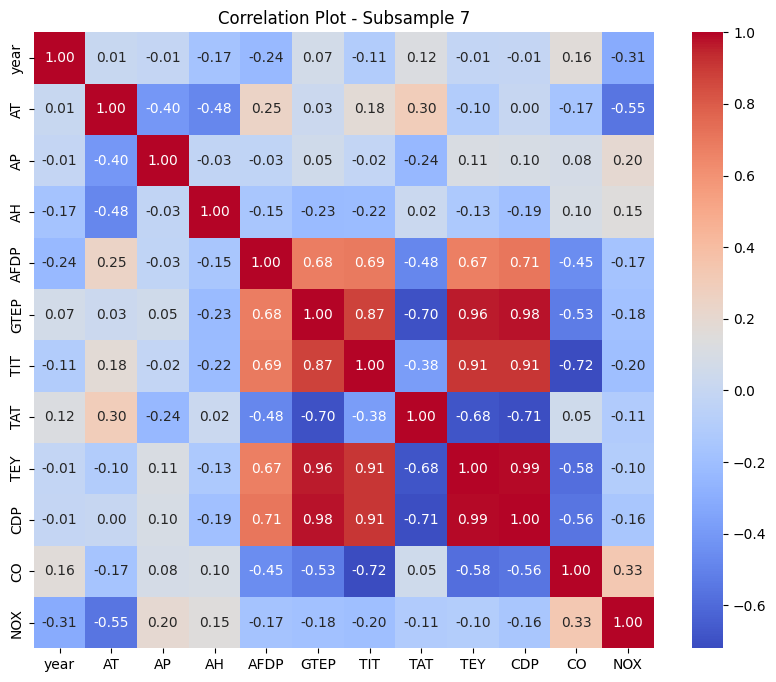

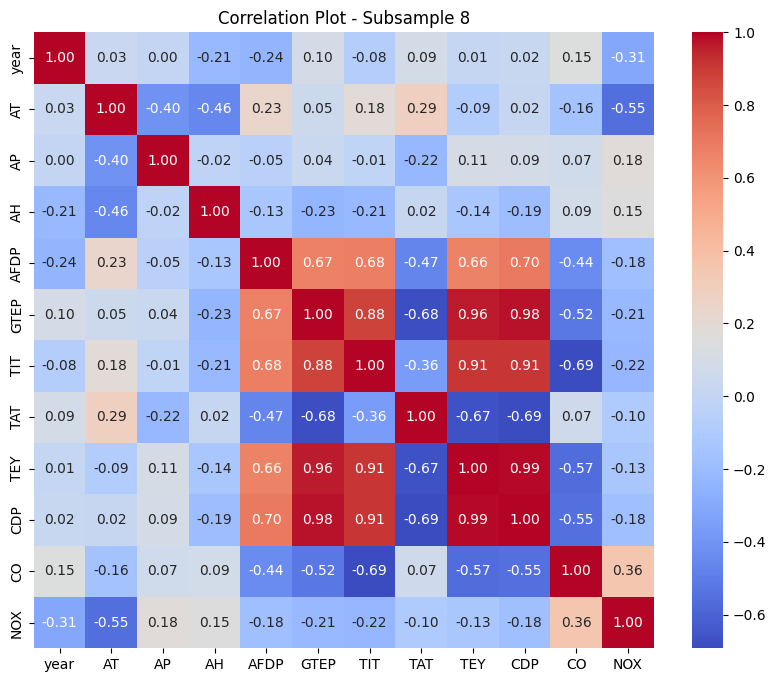

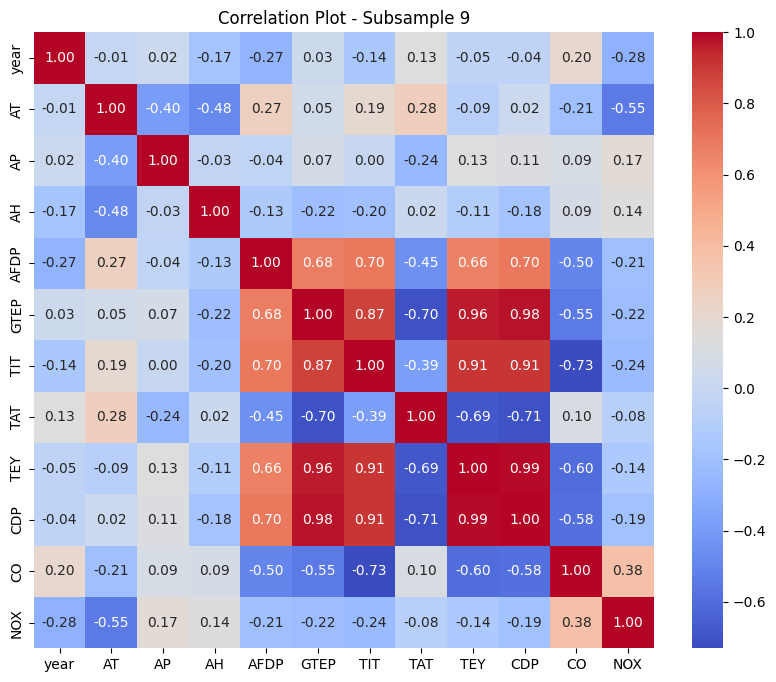

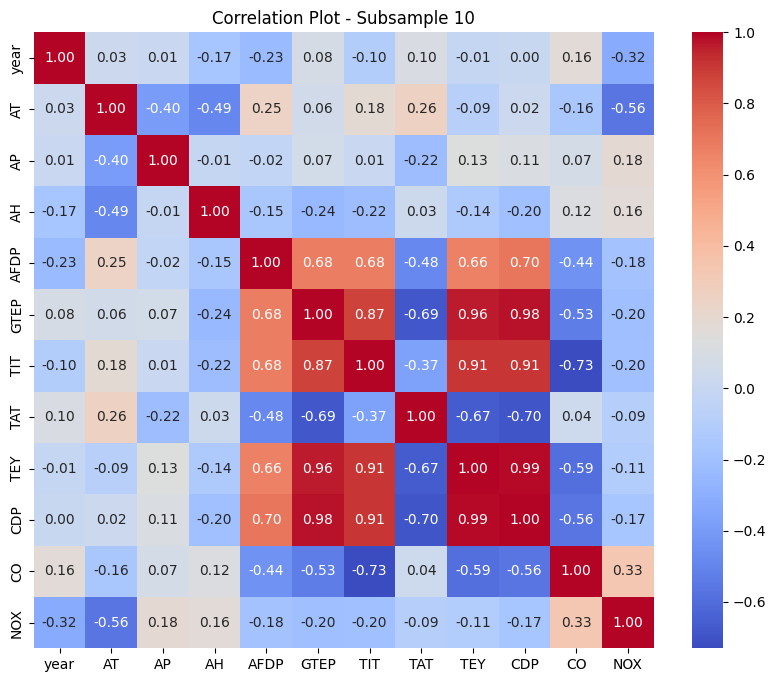

In [26]:
# Take 10 moderately sized subsamples
subsample_size = len(df) // 10
subsamples = []

for _ in range(10):
    subsample = df.sample(n=subsample_size)
    subsamples.append(subsample)

# Create correlation plots for each subsample
for i, subsample in enumerate(subsamples):
    # Select numerical columns for correlation
    numeric_cols = subsample.select_dtypes(include=np.number)
    # Calculate correlation matrix
    corr_matrix = numeric_cols.corr()
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Plot - Subsample {i+1}")
    plt.show()

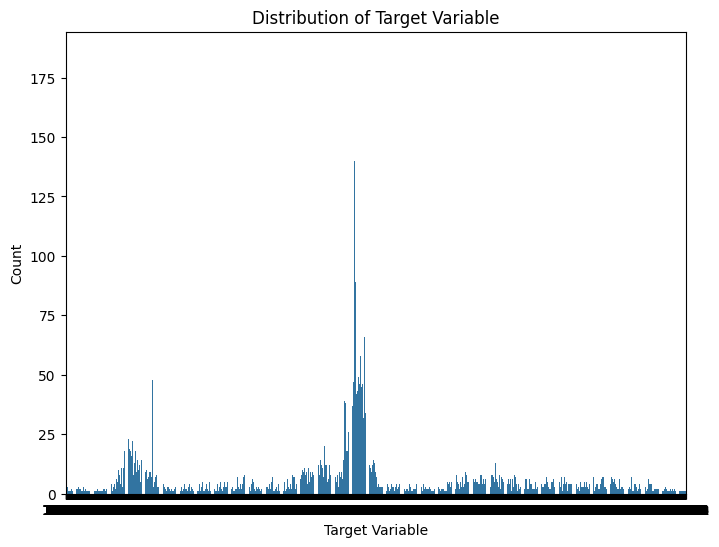

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming TEY is the target variable for classification
target_variable = 'TEY'

# Plot the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable, data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()


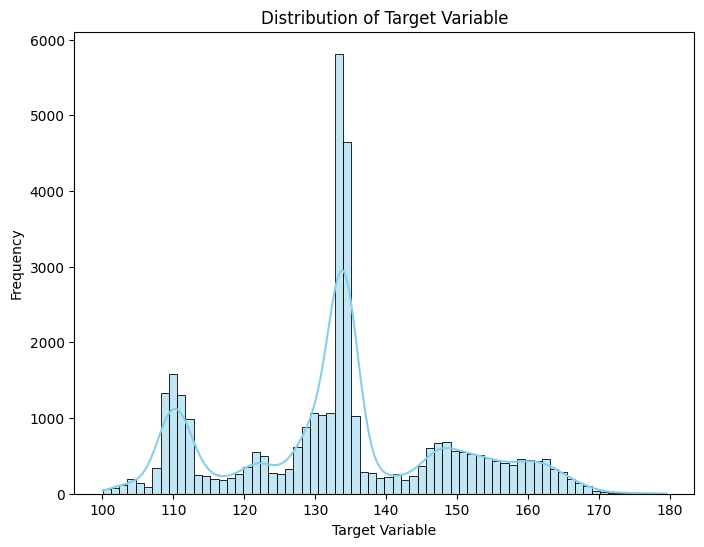

In [30]:
# Assuming TEY is the target variable for regression
target_variable = 'TEY'

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df[target_variable], kde=True, color='skyblue')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x800 with 0 Axes>

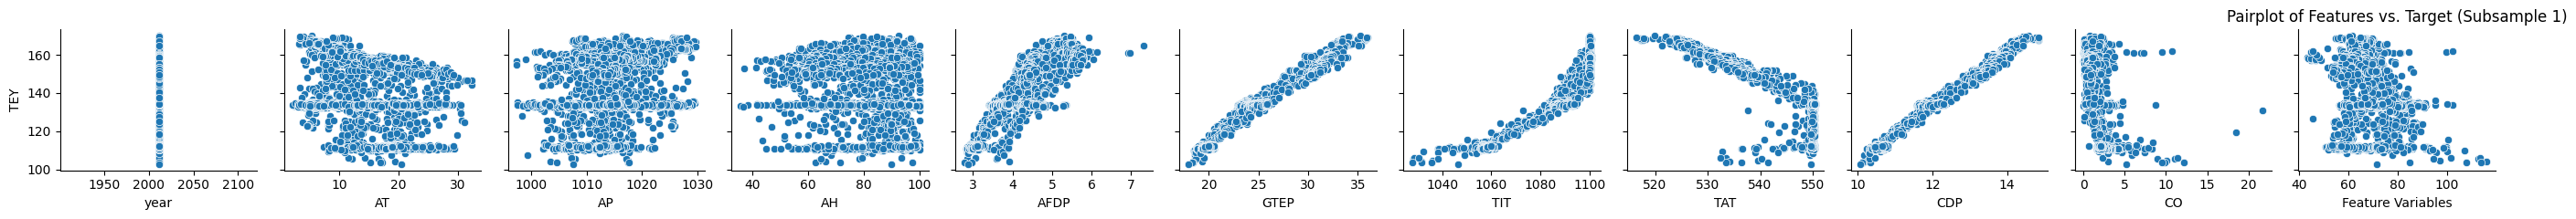

<Figure size 1200x800 with 0 Axes>

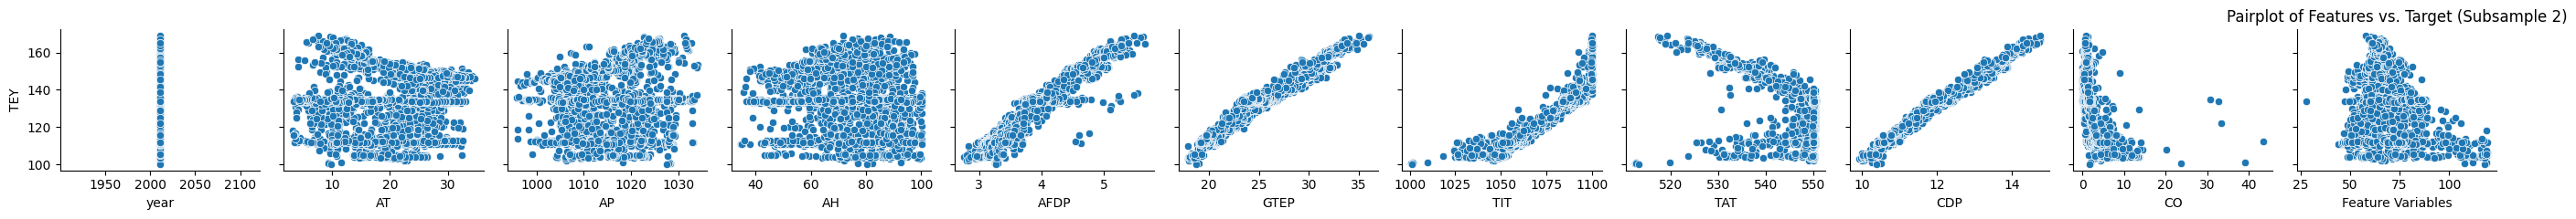

<Figure size 1200x800 with 0 Axes>

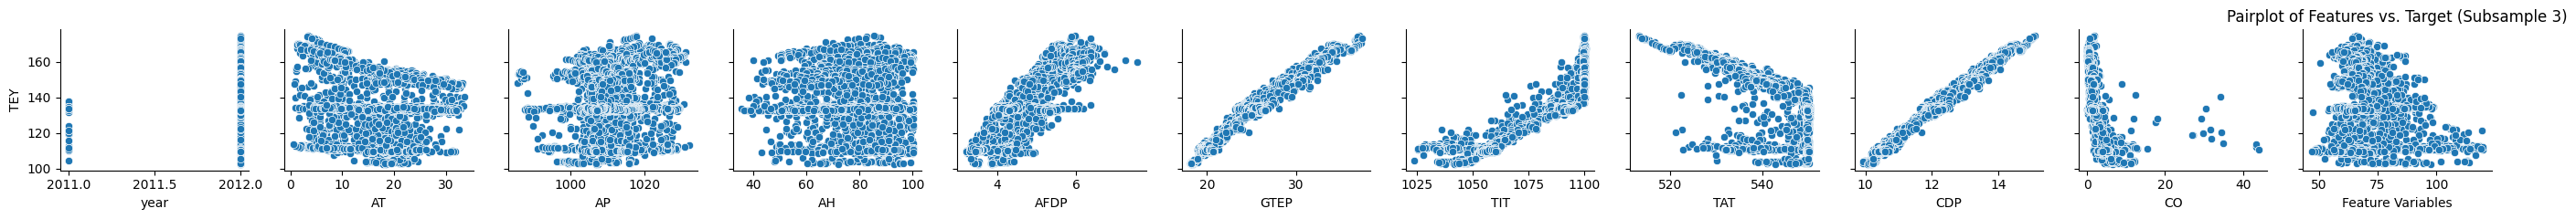

<Figure size 1200x800 with 0 Axes>

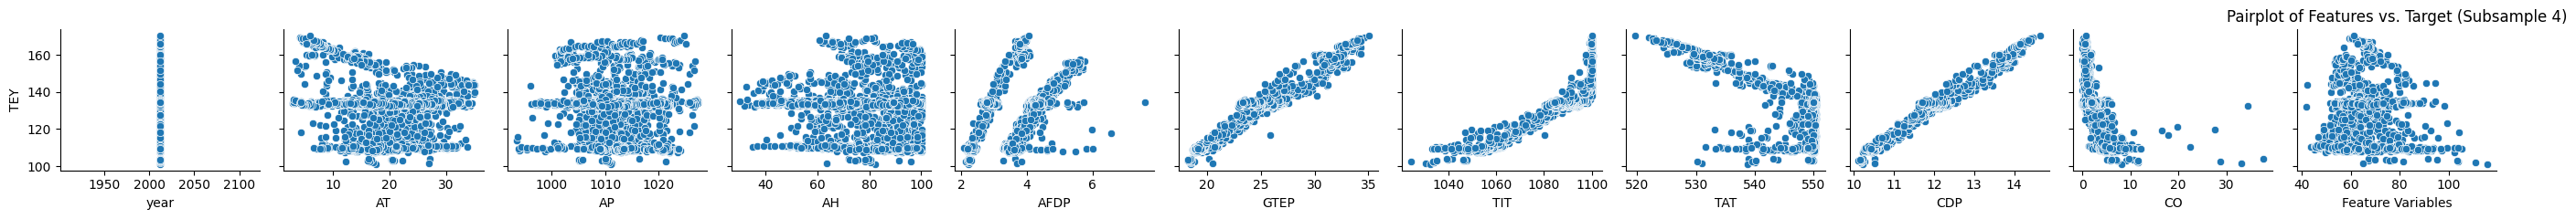

<Figure size 1200x800 with 0 Axes>

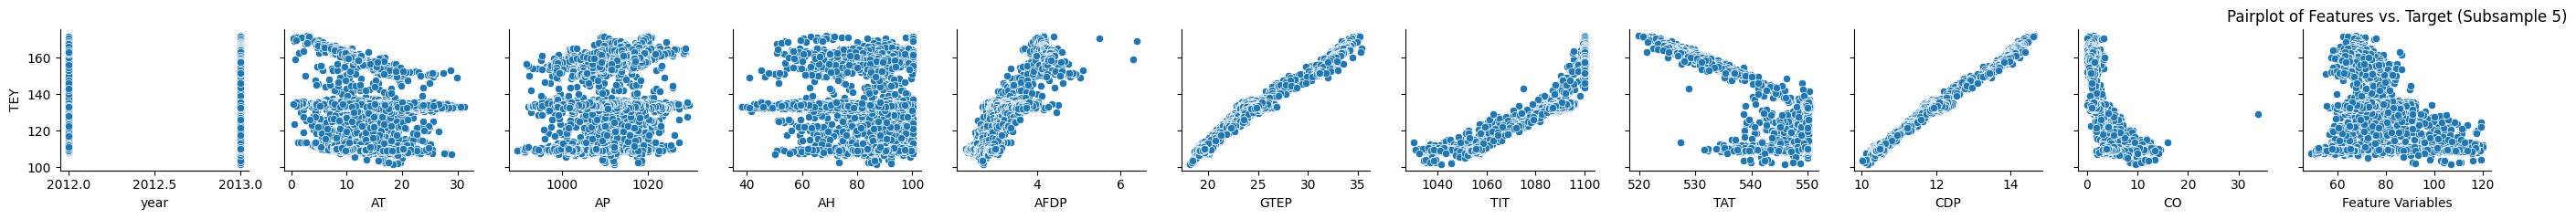

<Figure size 1200x800 with 0 Axes>

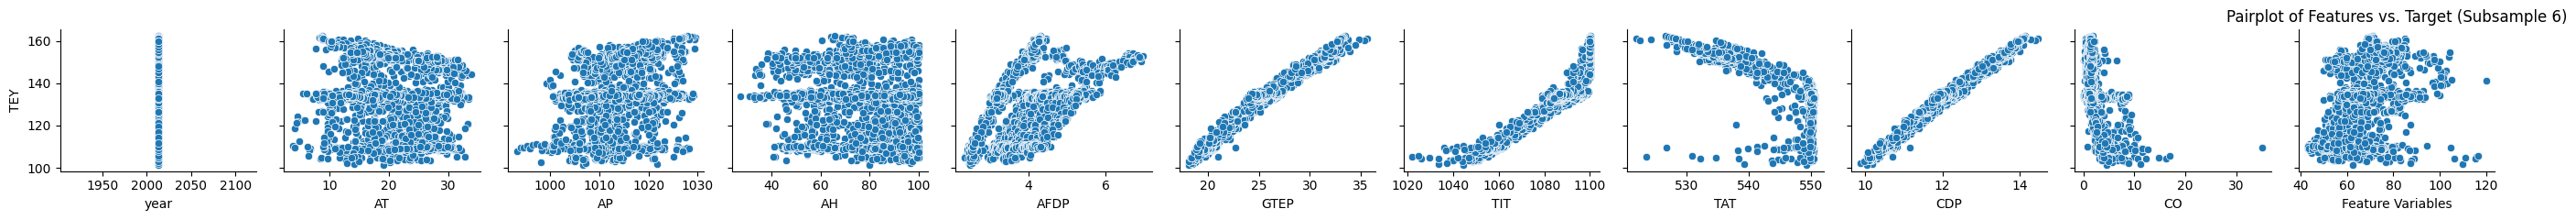

<Figure size 1200x800 with 0 Axes>

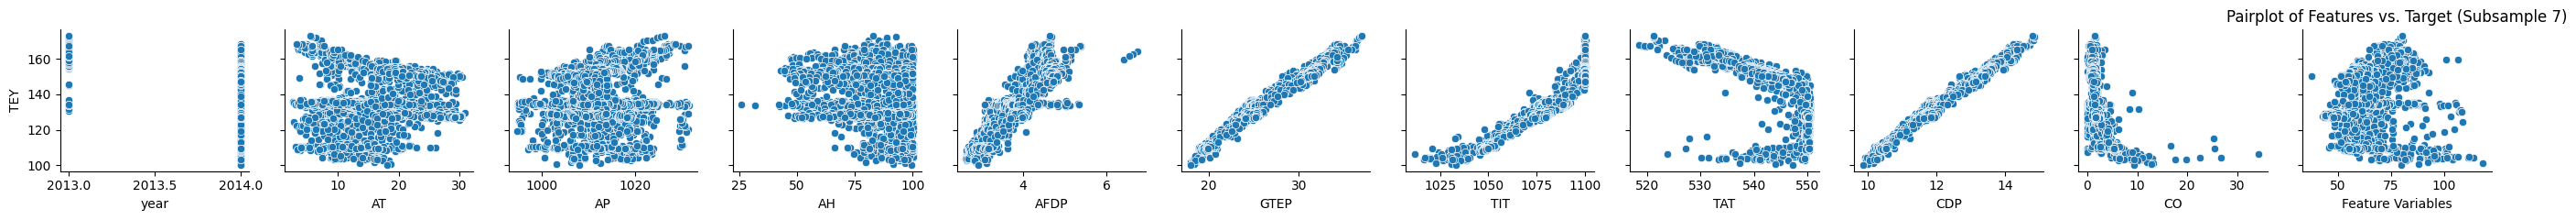

<Figure size 1200x800 with 0 Axes>

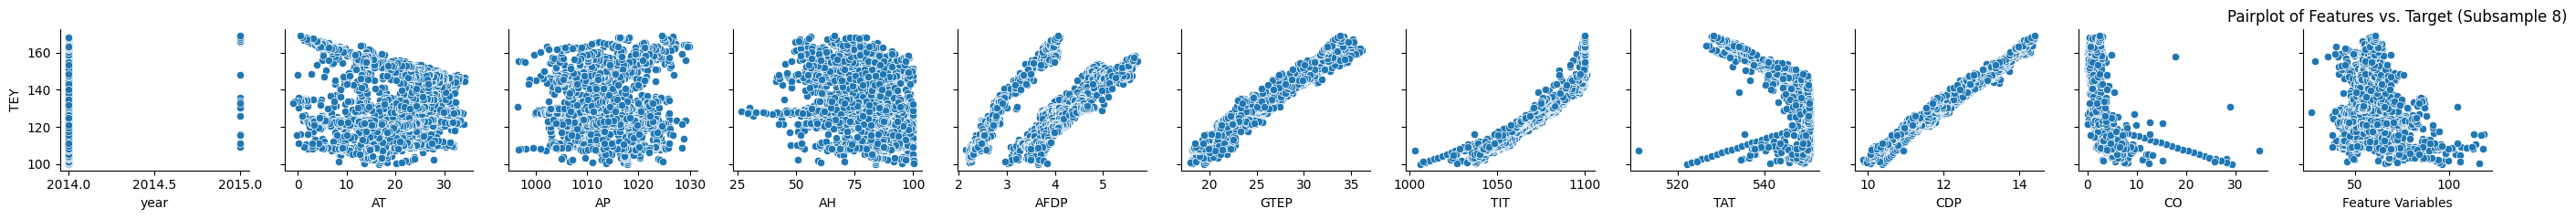

<Figure size 1200x800 with 0 Axes>

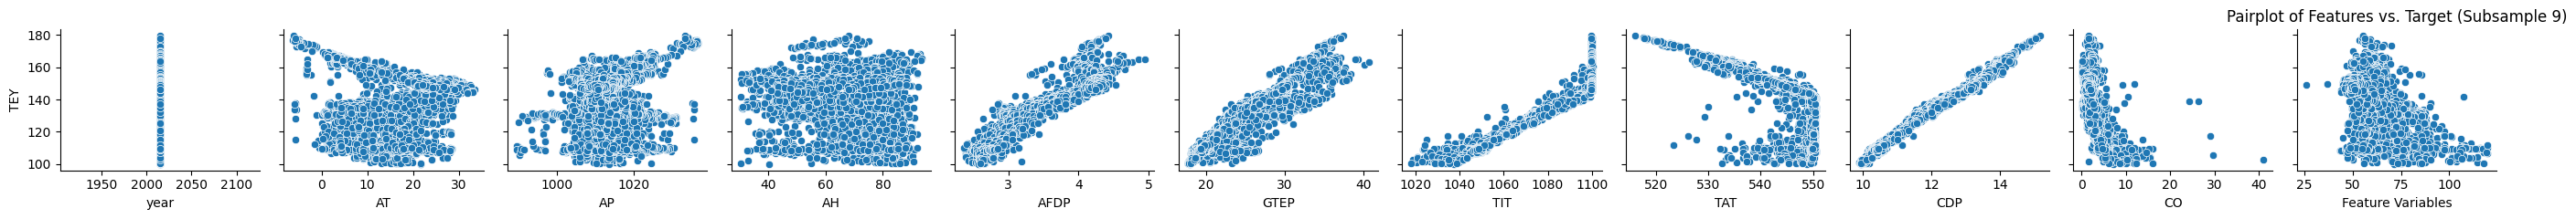

<Figure size 1200x800 with 0 Axes>

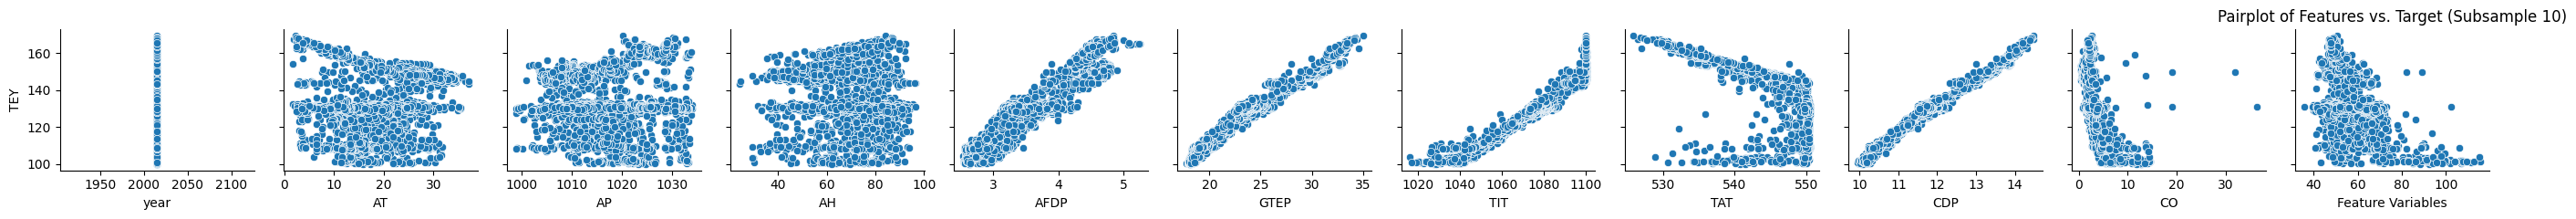

<Figure size 1200x800 with 0 Axes>

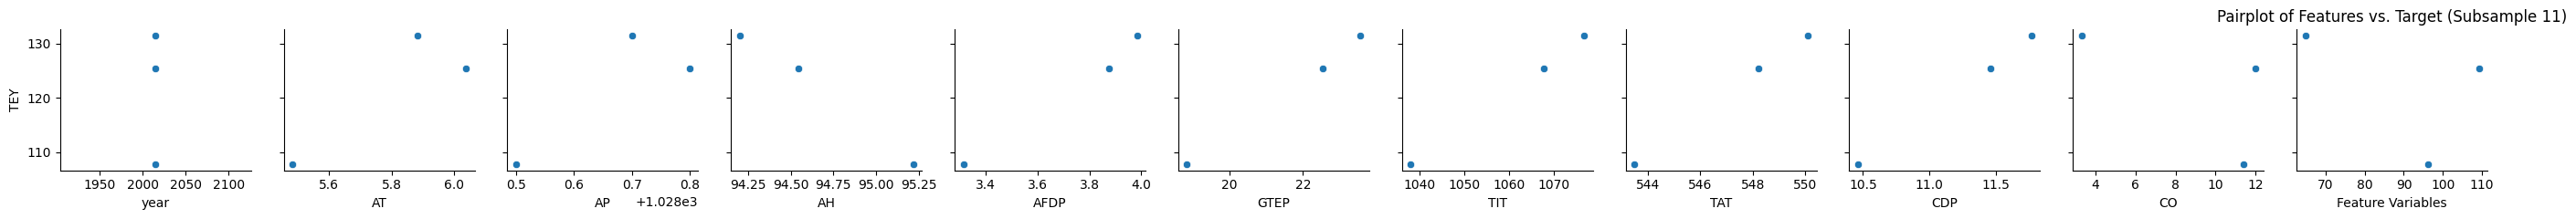

In [31]:

# Assuming TEY is the target variable
target_variable = 'TEY'

# Get feature variables
feature_variables = df.drop(columns=['TEY'])  # Assuming TEY is the target variable

# Take 10 moderately sized subsamples
num_samples = 10
subsample_size = len(df) // num_samples
subsamples = [df.iloc[i:i+subsample_size] for i in range(0, len(df), subsample_size)]

# Create pairplots for each subsample
for i, subsample in enumerate(subsamples):
    plt.figure(figsize=(12, 8))
    sns.pairplot(subsample, x_vars=feature_variables.columns, y_vars=[target_variable], kind='scatter')
    plt.title(f'Pairplot of Features vs. Target (Subsample {i+1})')
    plt.xlabel('Feature Variables')
    plt.ylabel('Target Variable')
    plt.tight_layout()
    plt.show()

<Figure size 1200x1000 with 0 Axes>

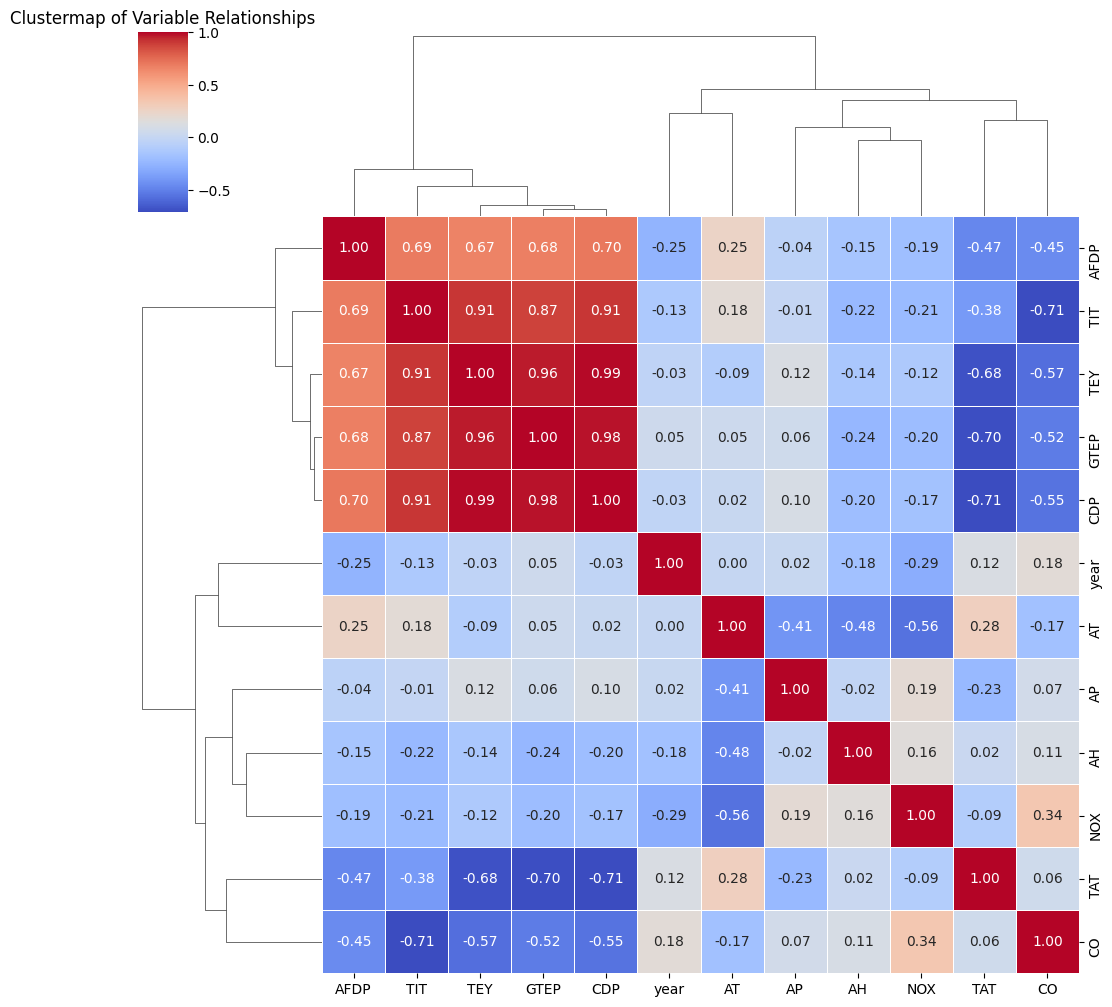

In [32]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a clustermap
plt.figure(figsize=(12, 10))
sns.clustermap(corr_matrix, cmap='coolwarm', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Clustermap of Variable Relationships')
plt.show()

In [40]:
# applying SVR since the data is continuous and not discrete

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Separate features and target variable
X = df.drop(columns=['TEY'])  # Assuming 'TEY' is the target variable
y = df['TEY']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVR model
svr_model = SVR()

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 163.77962984578477


In [43]:
# Cutting dataset since the computation took too long

sample_size = 1000  # Adjust this number as needed

# Randomly sample a subset of the data
sampled_data = df.sample(n=sample_size, random_state=42)

# Save the sampled data to a new CSV file
sampled_data.to_csv('sampled_gas_turbine_dataset.csv', index=False)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import classification_report

# Load the sampled dataset
data = pd.read_csv('sampled_gas_turbine_dataset.csv')

# Split the data into features and target
X = data.drop(columns=['TEY'])  # Replace 'target_column' with your target column name
y = data['TEY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SVR model
svr_model = SVR()

# Define parameter grid for GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf'],  # Fewer kernels to test
    'C': [0.1, 1, 10],  # Reduce the range of C values
    'gamma': ['scale']  # Just one value for gamma
}

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearch to the training data
X_sample = X_train.sample(frac=0.1, random_state=42)  # Use 10% of the training data
y_sample = y_train[X_sample.index]

grid_search.fit(X_sample, y_sample)


# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(best_params)

# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Print the results
print("\nGrid Search Results:")
print(results[['param_C', 'param_kernel', 'mean_test_score', 'std_test_score', 'rank_test_score']])


Best Parameters:
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Grid Search Results:
  param_C param_kernel  mean_test_score  std_test_score  rank_test_score
0     0.1       linear        -1.618341        0.476417                2
1     0.1          rbf      -246.334421       53.221411                6
2       1       linear        -1.492718        0.360128                1
3       1          rbf      -246.161950       53.201670                5
4      10       linear       -58.009423       34.728431                3
5      10          rbf      -244.435761       53.002338                4
